In [75]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [76]:
twm_savings_acct = pd.read_csv('mini-project-csv/twm_savings_acct.csv',
                        delimiter=';')
customers = pd.read_csv('mini-project-csv/twm_customer.csv',
                        delimiter=';')

In [77]:
twm_savings_acct.head()

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35


In [78]:
customers.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [79]:
# Joining customers and saing account dataframe - LEFT JOIN

df_saving= pd.merge(customers, twm_savings_acct, how='left',on=["cust_id"])

In [80]:
df_saving.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,...,city_name,state_code,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,...,Las Vegas,NV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,...,Los Angeles,CA,13624873.0,500.0,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,...,Los Angeles,CA,13631603.0,100.0,BS,Y,9.5.1988,NaN,113.04,122.54
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,...,Los Angeles,CA,13627523.0,100.0,BS,Y,20.2.1995,NaN,600.26,609.33
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,...,New York City,NY,13625483.0,100.0,BS,Y,11.11.1986,NaN,250.24,254.02


In [81]:
# Checking number of customers who dont have savings account

df_saving['acct_nbr'].isna().sum()

326

In [82]:
# Dropping demographics column

df_saving.drop(['income','age','years_with_bank','nbr_children','gender','marital_status','name_prefix','first_name','last_name','city_name','state_code' ,'street_nbr','street_name'],axis=1,inplace=True)

In [83]:
df_saving.head()

,cust_id,postal_code,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1362691,89194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1362487,90159,13624873.0,500.0,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1363160,90024,13631603.0,100.0,BS,Y,9.5.1988,NaN,113.04,122.54
3,1362752,90172,13627523.0,100.0,BS,Y,20.2.1995,NaN,600.26,609.33
4,1362548,10138,13625483.0,100.0,BS,Y,11.11.1986,NaN,250.24,254.02


In [84]:
# Rename columns names to savings 

df_saving = df_saving.rename(columns={'acct_nbr':'sv_acct_nbr','minimum_balance':'sv_minimum_balance','acct_type':'sv_acct_type','account_active':'sv_account_active','acct_start_date':'sv_acct_start_date','acct_end_date':'sv_acct_end_date',
                                     'starting_balance':'sv_starting_balance','ending_balance':'sv_ending_balance'})


In [85]:
df_saving

,cust_id,postal_code,sv_acct_nbr,sv_minimum_balance,sv_acct_type,sv_account_active,sv_acct_start_date,sv_acct_end_date,sv_starting_balance,sv_ending_balance
0,1362691,89194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1362487,90159,13624873.0,500.0,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1363160,90024,13631603.0,100.0,BS,Y,9.5.1988,NaN,113.04,122.54
3,1362752,90172,13627523.0,100.0,BS,Y,20.2.1995,NaN,600.26,609.33
4,1362548,10138,13625483.0,100.0,BS,Y,11.11.1986,NaN,250.24,254.02
...,...,...,...,...,...,...,...,...,...,...
742,1363324,90016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
743,1362895,10126,13628953.0,100.0,BS,Y,27.6.1995,NaN,169.96,96.25
744,1362569,87194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
745,1363364,35241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
# Pocessing credit acccounts

twm_credit_acct = pd.read_csv('mini-project-csv/twm_credit_acct.csv',
                        delimiter=';')

In [87]:
twm_credit_acct.head()

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00


In [88]:
#Renamaing CC coulumns
twm_credit_acct = twm_credit_acct.rename(columns={'acct_nbr':'cc_acct_nbr','account_active':'cc_account_active','acct_start_date':'cc_acct_start_date','acct_end_date':'cc_acct_end_date','starting_balance':'cc_starting_balance','ending_balance':'cc_ending_balance'})

In [89]:
twm_credit_acct

,cust_id,cc_acct_nbr,credit_limit,credit_rating,cc_account_active,cc_acct_start_date,cc_acct_end_date,cc_starting_balance,cc_ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00
...,...,...,...,...,...,...,...,...,...
463,1363364,4561143213633640,3000,0,N,23.11.1989,23.7.1995,1783.86,1785.97
464,1363467,4561143213634670,1500,0,Y,30.6.1993,NaN,1193.89,1500.00
465,1363263,4561143213632630,3000,0,Y,29.3.1995,NaN,0.00,1218.94
466,1362569,4561143213625690,9200,0,Y,6.12.1995,NaN,0.00,9200.00


In [90]:
#Left join savings and Credit card dataframes
df_saving_cc = pd.merge(df_saving, twm_credit_acct, how='left',on=["cust_id"])

In [91]:
df_saving_cc

,cust_id,postal_code,sv_acct_nbr,sv_minimum_balance,sv_acct_type,sv_account_active,sv_acct_start_date,sv_acct_end_date,sv_starting_balance,sv_ending_balance,cc_acct_nbr,credit_limit,credit_rating,cc_account_active,cc_acct_start_date,cc_acct_end_date,cc_starting_balance,cc_ending_balance
0,1362691,89194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1362487,90159,13624873.0,500.0,MM,N,27.6.1994,25.8.1995,651.73,12.89,4.561143e+15,3000.0,0.0,Y,8.8.1995,NaN,0.00,1548.23
2,1363160,90024,13631603.0,100.0,BS,Y,9.5.1988,NaN,113.04,122.54,4.561143e+15,1000.0,0.0,Y,12.10.1988,NaN,657.46,286.69
3,1362752,90172,13627523.0,100.0,BS,Y,20.2.1995,NaN,600.26,609.33,4.561143e+15,2400.0,0.0,N,9.10.1994,2.4.1995,2302.14,0.00
4,1362548,10138,13625483.0,100.0,BS,Y,11.11.1986,NaN,250.24,254.02,4.561143e+15,6700.0,0.0,Y,11.11.1986,NaN,6965.25,68.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,90016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
743,1362895,10126,13628953.0,100.0,BS,Y,27.6.1995,NaN,169.96,96.25,4.561143e+15,1300.0,0.0,Y,3.10.1995,NaN,0.00,1300.00
744,1362569,87194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.561143e+15,9200.0,0.0,Y,6.12.1995,NaN,0.00,9200.00
745,1363364,35241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.561143e+15,3000.0,0.0,N,23.11.1989,23.7.1995,1783.86,1785.97


In [92]:
# Checking number of customers who dont have CC account

df_saving_cc['cc_acct_nbr'].isna().sum()

279

In [93]:
# Pocessing checkinh acccounts

twm_checking_acct = pd.read_csv('mini-project-csv/twm_checking_acct.csv',
                        delimiter=';')

In [94]:
twm_checking_acct.shape

(520, 9)

In [95]:
twm_checking_acct

,cust_id,acct_nbr,minimum_balance,per_check_fee,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1362548,13625482,3000,0.00,Y,11.11.1986,NaN,6004.34,569.65
1,1362487,13624872,3000,0.00,Y,12.1.1995,NaN,2781.07,1401.21
2,1363017,13630172,3000,0.00,Y,19.3.1994,NaN,2694.91,147.15
3,1362752,13627522,100,0.15,Y,8.1.1994,NaN,487.69,3.76
4,1363282,13632822,100,0.15,Y,5.3.1988,NaN,133.90,84.18
...,...,...,...,...,...,...,...,...,...
515,1363467,13634672,3000,0.00,Y,15.1.1995,NaN,4155.98,58.47
516,1362855,13628552,200,0.15,Y,2.9.1994,NaN,202.30,1070.87
517,1363324,13633242,3000,0.00,Y,25.8.1994,NaN,4010.41,2325.37
518,1362569,13625692,200,0.15,Y,6.4.1995,NaN,927.07,46.48


In [96]:
#Renamaing checking accounts coulumns
twm_checking_acct = twm_checking_acct.rename(columns={'acct_nbr':'chk_acct_nbr','minimum_balance':'chk_minimum_balance','account_active':'chk_account_active','acct_start_date':'chk_acct_start_date','acct_end_date':'chk_acct_end_date','starting_balance':'chk_starting_balance',
                                                      'ending_balance':'chk_ending_balance'})

In [97]:
twm_checking_acct

,cust_id,chk_acct_nbr,chk_minimum_balance,per_check_fee,chk_account_active,chk_acct_start_date,chk_acct_end_date,chk_starting_balance,chk_ending_balance
0,1362548,13625482,3000,0.00,Y,11.11.1986,NaN,6004.34,569.65
1,1362487,13624872,3000,0.00,Y,12.1.1995,NaN,2781.07,1401.21
2,1363017,13630172,3000,0.00,Y,19.3.1994,NaN,2694.91,147.15
3,1362752,13627522,100,0.15,Y,8.1.1994,NaN,487.69,3.76
4,1363282,13632822,100,0.15,Y,5.3.1988,NaN,133.90,84.18
...,...,...,...,...,...,...,...,...,...
515,1363467,13634672,3000,0.00,Y,15.1.1995,NaN,4155.98,58.47
516,1362855,13628552,200,0.15,Y,2.9.1994,NaN,202.30,1070.87
517,1363324,13633242,3000,0.00,Y,25.8.1994,NaN,4010.41,2325.37
518,1362569,13625692,200,0.15,Y,6.4.1995,NaN,927.07,46.48


In [98]:
#Left join savings , Credit card and checking account dataframes
df_accounts_sv_cc_chk = pd.merge(df_saving_cc, twm_checking_acct, how='left',on=["cust_id"])

In [99]:
df_accounts_sv_cc_chk 

,cust_id,postal_code,sv_acct_nbr,sv_minimum_balance,sv_acct_type,sv_account_active,sv_acct_start_date,sv_acct_end_date,sv_starting_balance,sv_ending_balance,...,cc_starting_balance,cc_ending_balance,chk_acct_nbr,chk_minimum_balance,per_check_fee,chk_account_active,chk_acct_start_date,chk_acct_end_date,chk_starting_balance,chk_ending_balance
0,1362691,89194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1362487,90159,13624873.0,500.0,MM,N,27.6.1994,25.8.1995,651.73,12.89,...,0.00,1548.23,13624872.0,3000.0,0.00,Y,12.1.1995,NaN,2781.07,1401.21
2,1363160,90024,13631603.0,100.0,BS,Y,9.5.1988,NaN,113.04,122.54,...,657.46,286.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1362752,90172,13627523.0,100.0,BS,Y,20.2.1995,NaN,600.26,609.33,...,2302.14,0.00,13627522.0,100.0,0.15,Y,8.1.1994,NaN,487.69,3.76
4,1362548,10138,13625483.0,100.0,BS,Y,11.11.1986,NaN,250.24,254.02,...,6965.25,68.68,13625482.0,3000.0,0.00,Y,11.11.1986,NaN,6004.34,569.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,90016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,13633242.0,3000.0,0.00,Y,25.8.1994,NaN,4010.41,2325.37
743,1362895,10126,13628953.0,100.0,BS,Y,27.6.1995,NaN,169.96,96.25,...,0.00,1300.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
744,1362569,87194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,9200.00,13625692.0,200.0,0.15,Y,6.4.1995,NaN,927.07,46.48
745,1363364,35241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1783.86,1785.97,13633642.0,100.0,0.15,Y,13.3.1995,NaN,1287.08,296.28


In [100]:
df_accounts_all = df_accounts_sv_cc_chk.drop(['chk_acct_start_date','chk_acct_end_date','sv_acct_start_date','sv_acct_end_date','cc_acct_start_date','cc_acct_end_date','per_check_fee','postal_code'], axis=1)

In [101]:
df_accounts_all

,cust_id,sv_acct_nbr,sv_minimum_balance,sv_acct_type,sv_account_active,sv_starting_balance,sv_ending_balance,cc_acct_nbr,credit_limit,credit_rating,cc_account_active,cc_starting_balance,cc_ending_balance,chk_acct_nbr,chk_minimum_balance,chk_account_active,chk_starting_balance,chk_ending_balance
0,1362691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1362487,13624873.0,500.0,MM,N,651.73,12.89,4.561143e+15,3000.0,0.0,Y,0.00,1548.23,13624872.0,3000.0,Y,2781.07,1401.21
2,1363160,13631603.0,100.0,BS,Y,113.04,122.54,4.561143e+15,1000.0,0.0,Y,657.46,286.69,NaN,NaN,NaN,NaN,NaN
3,1362752,13627523.0,100.0,BS,Y,600.26,609.33,4.561143e+15,2400.0,0.0,N,2302.14,0.00,13627522.0,100.0,Y,487.69,3.76
4,1362548,13625483.0,100.0,BS,Y,250.24,254.02,4.561143e+15,6700.0,0.0,Y,6965.25,68.68,13625482.0,3000.0,Y,6004.34,569.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13633242.0,3000.0,Y,4010.41,2325.37
743,1362895,13628953.0,100.0,BS,Y,169.96,96.25,4.561143e+15,1300.0,0.0,Y,0.00,1300.00,NaN,NaN,NaN,NaN,NaN
744,1362569,NaN,NaN,NaN,NaN,NaN,NaN,4.561143e+15,9200.0,0.0,Y,0.00,9200.00,13625692.0,200.0,Y,927.07,46.48
745,1363364,NaN,NaN,NaN,NaN,NaN,NaN,4.561143e+15,3000.0,0.0,N,1783.86,1785.97,13633642.0,100.0,Y,1287.08,296.28


In [102]:
# Checking number of customers who dont have checking account

df_accounts_sv_cc_chk['chk_acct_nbr'].isna().sum()

227

In [103]:
df_accounts_sv_cc_chk.columns

Index(['cust_id', 'postal_code', 'sv_acct_nbr', 'sv_minimum_balance',
       'sv_acct_type', 'sv_account_active', 'sv_acct_start_date',
       'sv_acct_end_date', 'sv_starting_balance', 'sv_ending_balance',
       'cc_acct_nbr', 'credit_limit', 'credit_rating', 'cc_account_active',
       'cc_acct_start_date', 'cc_acct_end_date', 'cc_starting_balance',
       'cc_ending_balance', 'chk_acct_nbr', 'chk_minimum_balance',
       'per_check_fee', 'chk_account_active', 'chk_acct_start_date',
       'chk_acct_end_date', 'chk_starting_balance', 'chk_ending_balance'],
      dtype='object')

In [104]:
df_accounts_sv_cc_chk.isna().sum()

cust_id                   0
postal_code               0
sv_acct_nbr             326
sv_minimum_balance      326
sv_acct_type            326
sv_account_active       326
sv_acct_start_date      326
sv_acct_end_date        701
sv_starting_balance     326
sv_ending_balance       326
cc_acct_nbr             279
credit_limit            279
credit_rating           279
cc_account_active       279
cc_acct_start_date      279
cc_acct_end_date        702
cc_starting_balance     279
cc_ending_balance       279
chk_acct_nbr            227
chk_minimum_balance     227
per_check_fee           227
chk_account_active      227
chk_acct_start_date     227
chk_acct_end_date       695
chk_starting_balance    227
chk_ending_balance      227
dtype: int64

In [105]:
# processing transactions csv files
twm_checking_tran = pd.read_csv('mini-project-csv/twm_checking_tran.csv',delimiter=';')
twm_savings_tran = pd.read_csv('mini-project-csv/twm_savings_tran.csv',delimiter=';')
twm_credit_tran = pd.read_csv('mini-project-csv/twm_credit_tran.csv',delimiter=';')

In [106]:
twm_checking_tran

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,-0.15,-0.15,0.0,58.99,29.1.1995,,,FK
1,1362784,90,-200.00,-200.00,0.0,1380.69,2.7.1995,53313,A,WD
2,1363088,46,0.00,0.00,0.0,128.35,26.3.1995,834,A,IQ
3,1363306,32,-40.32,-40.32,0.0,433.06,29.1.1995,,P,WD
4,1363251,11,-87.88,-87.88,0.0,1919.55,8.2.1995,,P,WD
...,...,...,...,...,...,...,...,...,...,...
46199,1363272,50,-0.15,-0.15,0.0,319.71,3.10.1995,,,FK
46200,1363393,61,-102.52,-102.52,0.0,57.47,22.1.1995,,P,WD
46201,1363365,25,-275.89,-275.89,0.0,2632.93,8.1.1995,,P,WD
46202,1363031,73,-0.15,-0.15,0.0,1103.47,23.1.1995,,,FK


In [107]:
customer_transaction_summary_ck = twm_checking_tran.groupby('cust_id').agg(
    transaction_count=('tran_id', 'count'),
    average_transaction_amount=('tran_amt', 'mean')
).reset_index()

customer_transaction_summary_ck

,cust_id,transaction_count,average_transaction_amount
0,1362480,99,-2.474646
1,1362484,99,-25.435758
2,1362485,99,-1.659495
3,1362486,25,-37.604800
4,1362487,52,-26.513269
...,...,...,...
515,1363483,99,2.617273
516,1363484,99,-23.918283
517,1363492,99,-12.570404
518,1363493,99,-41.110505


In [108]:
customer_transaction_summary_ck = customer_transaction_summary_ck.rename(columns={'transaction_count':'ck_trans_count','average_transaction_amount':'ck_avg_trans'})

In [109]:
customer_transaction_summary_ck

,cust_id,ck_trans_count,ck_avg_trans
0,1362480,99,-2.474646
1,1362484,99,-25.435758
2,1362485,99,-1.659495
3,1362486,25,-37.604800
4,1362487,52,-26.513269
...,...,...,...
515,1363483,99,2.617273
516,1363484,99,-23.918283
517,1363492,99,-12.570404
518,1363493,99,-41.110505


In [110]:
twm_savings_tran

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,136.03,136.03,0.00,1521.57,26.10.1995,84111,A,DP
1,1362746,1,2.83,0.00,2.83,2265.90,31.1.1995,235959,,IN
2,1363251,11,13.56,0.00,13.56,5438.90,30.4.1995,235959,,IN
3,1362542,4,0.76,0.00,0.76,610.92,30.4.1995,235959,,IN
4,1363387,11,148.69,148.69,0.00,470.05,21.5.1995,144736,E,DP
...,...,...,...,...,...,...,...,...,...,...
11184,1362950,10,1.68,0.00,1.68,674.90,31.10.1995,235959,,IN
11185,1362721,14,0.02,0.00,0.02,13.82,30.9.1995,235959,,IN
11186,1362806,4,3.60,0.00,3.60,1444.57,30.4.1995,235959,,IN
11187,1362995,36,541.91,541.91,0.00,4326.98,24.9.1995,150959,E,DP


In [111]:
customer_transaction_summary_sv = twm_savings_tran.groupby('cust_id').agg(
    transaction_count=('tran_id', 'count'),
    average_transaction_amount=('tran_amt', 'mean')
).reset_index()

customer_transaction_summary_sv

,cust_id,transaction_count,average_transaction_amount
0,1362480,26,18.550769
1,1362484,33,58.474545
2,1362486,25,-6.729600
3,1362487,19,-33.623158
4,1362489,22,-17.572273
...,...,...,...
415,1363490,12,2.853333
416,1363491,18,-10.423889
417,1363492,25,6.563200
418,1363493,19,11.706842


In [112]:
customer_transaction_summary_sv = customer_transaction_summary_sv.rename(columns={'transaction_count':'sv_trans_count','average_transaction_amount':'sv_avg_trans'})

In [113]:
customer_transaction_summary_sv

,cust_id,sv_trans_count,sv_avg_trans
0,1362480,26,18.550769
1,1362484,33,58.474545
2,1362486,25,-6.729600
3,1362487,19,-33.623158
4,1362489,22,-17.572273
...,...,...,...
415,1363490,12,2.853333
416,1363491,18,-10.423889
417,1363492,25,6.563200
418,1363493,19,11.706842


In [114]:
twm_credit_tran

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363088,46,-121.49,-121.49,0.0,-141.00,20.10.1995,101144,E,CG
1,1363306,32,-220.64,-220.64,0.0,-520.13,13.10.1995,83115,E,CG
2,1362959,10,0.00,0.00,0.0,-3900.00,26.2.1995,84129,K,IQ
3,1363429,13,-195.27,-195.27,0.0,-1739.74,3.1.1995,191815,E,CG
4,1363393,14,-37.32,-37.32,0.0,-198.98,4.7.1995,100811,E,CG
...,...,...,...,...,...,...,...,...,...,...
20162,1363002,60,-94.52,-94.52,0.0,-3733.22,20.5.1995,224723,E,CG
20163,1362995,36,0.00,0.00,0.0,-2300.00,28.9.1995,142011,B,IQ
20164,1363196,39,-100.00,-100.00,0.0,-289.91,12.5.1995,152852,A,CA
20165,1363393,61,-63.04,-63.04,0.0,-736.70,16.10.1995,145535,E,CG


In [115]:
customer_transaction_summary_cc = twm_credit_tran.groupby('cust_id').agg(
    cc_trans_count=('tran_id', 'count'),
    avg_trans_count=('tran_amt', 'mean')
).reset_index()

customer_transaction_summary_cc

,cust_id,cc_trans_count,avg_trans_count
0,1362480,32,60.895625
1,1362484,55,16.797636
2,1362485,72,-10.572639
3,1362487,32,-47.987187
4,1362489,35,48.405143
...,...,...,...
452,1363483,77,0.334805
453,1363484,39,12.080513
454,1363485,23,139.239565
455,1363486,38,0.000000


In [116]:
twm_transactions = pd.read_csv('mini-project-csv/twm_transactions.csv',delimiter=';')

In [117]:
twm_transactions

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ
...,...,...,...,...,...,...,...,...,...,...
77575,77,13631752,-95.71,-95.71,0.0,95.71,14.2.1995,161001,A,TR
77576,94,13626772,-93.90,-93.90,0.0,824.36,11.3.1995,0,P,WD
77577,42,13625262,-10.35,-10.35,0.0,10.36,26.8.1995,0,P,WD
77578,98,13627052,-423.80,-423.80,0.0,162.28,13.6.1995,110209,E,WD


In [118]:
df_accounts_all = pd.merge(df_accounts_all, customer_transaction_summary_ck, on="cust_id", how="left")
df_accounts_all = pd.merge(df_accounts_all, customer_transaction_summary_sv, on="cust_id", how="left")
df_accounts_all = pd.merge(df_accounts_all, customer_transaction_summary_cc, on="cust_id", how="left")

In [119]:
df_accounts_all

,cust_id,sv_acct_nbr,sv_minimum_balance,sv_acct_type,sv_account_active,sv_starting_balance,sv_ending_balance,cc_acct_nbr,credit_limit,credit_rating,...,chk_minimum_balance,chk_account_active,chk_starting_balance,chk_ending_balance,ck_trans_count,ck_avg_trans,sv_trans_count,sv_avg_trans,cc_trans_count,avg_trans_count
0,1362691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1362487,13624873.0,500.0,MM,N,651.73,12.89,4.561143e+15,3000.0,0.0,...,3000.0,Y,2781.07,1401.21,52.0,-26.513269,19.0,-33.623158,32.0,-47.987187
2,1363160,13631603.0,100.0,BS,Y,113.04,122.54,4.561143e+15,1000.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,48.0,0.197917,68.0,5.588676
3,1362752,13627523.0,100.0,BS,Y,600.26,609.33,4.561143e+15,2400.0,0.0,...,100.0,Y,487.69,3.76,93.0,-5.203548,12.0,0.755833,15.0,160.443333
4,1362548,13625483.0,100.0,BS,Y,250.24,254.02,4.561143e+15,6700.0,0.0,...,3000.0,Y,6004.34,569.65,99.0,-54.895859,12.0,0.315000,22.0,317.147727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3000.0,Y,4010.41,2325.37,44.0,-38.292273,NaN,NaN,NaN,NaN
743,1362895,13628953.0,100.0,BS,Y,169.96,96.25,4.561143e+15,1300.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,28.0,-2.632500,27.0,-47.680370
744,1362569,NaN,NaN,NaN,NaN,NaN,NaN,4.561143e+15,9200.0,0.0,...,200.0,Y,927.07,46.48,99.0,-8.894848,NaN,NaN,28.0,-328.571429
745,1363364,NaN,NaN,NaN,NaN,NaN,NaN,4.561143e+15,3000.0,0.0,...,100.0,Y,1287.08,296.28,99.0,-10.008081,NaN,NaN,75.0,0.247333


In [121]:
df_accounts_all.loc[~df_accounts_all['sv_acct_nbr'].isna(), 'sv_acct_nbr'] = 1


,cust_id,sv_acct_nbr,sv_minimum_balance,sv_acct_type,sv_account_active,sv_starting_balance,sv_ending_balance,cc_acct_nbr,credit_limit,credit_rating,...,chk_minimum_balance,chk_account_active,chk_starting_balance,chk_ending_balance,ck_trans_count,ck_avg_trans,sv_trans_count,sv_avg_trans,cc_trans_count,avg_trans_count
0,1362691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1362487,1.0,500.0,MM,N,651.73,12.89,4.561143e+15,3000.0,0.0,...,3000.0,Y,2781.07,1401.21,52.0,-26.513269,19.0,-33.623158,32.0,-47.987187
2,1363160,1.0,100.0,BS,Y,113.04,122.54,4.561143e+15,1000.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,48.0,0.197917,68.0,5.588676
3,1362752,1.0,100.0,BS,Y,600.26,609.33,4.561143e+15,2400.0,0.0,...,100.0,Y,487.69,3.76,93.0,-5.203548,12.0,0.755833,15.0,160.443333
4,1362548,1.0,100.0,BS,Y,250.24,254.02,4.561143e+15,6700.0,0.0,...,3000.0,Y,6004.34,569.65,99.0,-54.895859,12.0,0.315000,22.0,317.147727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3000.0,Y,4010.41,2325.37,44.0,-38.292273,NaN,NaN,NaN,NaN
743,1362895,1.0,100.0,BS,Y,169.96,96.25,4.561143e+15,1300.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,28.0,-2.632500,27.0,-47.680370
744,1362569,NaN,NaN,NaN,NaN,NaN,NaN,4.561143e+15,9200.0,0.0,...,200.0,Y,927.07,46.48,99.0,-8.894848,NaN,NaN,28.0,-328.571429
745,1363364,NaN,NaN,NaN,NaN,NaN,NaN,4.561143e+15,3000.0,0.0,...,100.0,Y,1287.08,296.28,99.0,-10.008081,NaN,NaN,75.0,0.247333


In [123]:
df_accounts_all['sv_acct_nbr'] = df_accounts_all['sv_acct_nbr'].fillna(0)

In [124]:
df_accounts_all

,cust_id,sv_acct_nbr,sv_minimum_balance,sv_acct_type,sv_account_active,sv_starting_balance,sv_ending_balance,cc_acct_nbr,credit_limit,credit_rating,...,chk_minimum_balance,chk_account_active,chk_starting_balance,chk_ending_balance,ck_trans_count,ck_avg_trans,sv_trans_count,sv_avg_trans,cc_trans_count,avg_trans_count
0,1362691,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1362487,1.0,500.0,MM,N,651.73,12.89,4.561143e+15,3000.0,0.0,...,3000.0,Y,2781.07,1401.21,52.0,-26.513269,19.0,-33.623158,32.0,-47.987187
2,1363160,1.0,100.0,BS,Y,113.04,122.54,4.561143e+15,1000.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,48.0,0.197917,68.0,5.588676
3,1362752,1.0,100.0,BS,Y,600.26,609.33,4.561143e+15,2400.0,0.0,...,100.0,Y,487.69,3.76,93.0,-5.203548,12.0,0.755833,15.0,160.443333
4,1362548,1.0,100.0,BS,Y,250.24,254.02,4.561143e+15,6700.0,0.0,...,3000.0,Y,6004.34,569.65,99.0,-54.895859,12.0,0.315000,22.0,317.147727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3000.0,Y,4010.41,2325.37,44.0,-38.292273,NaN,NaN,NaN,NaN
743,1362895,1.0,100.0,BS,Y,169.96,96.25,4.561143e+15,1300.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,28.0,-2.632500,27.0,-47.680370
744,1362569,0.0,NaN,NaN,NaN,NaN,NaN,4.561143e+15,9200.0,0.0,...,200.0,Y,927.07,46.48,99.0,-8.894848,NaN,NaN,28.0,-328.571429
745,1363364,0.0,NaN,NaN,NaN,NaN,NaN,4.561143e+15,3000.0,0.0,...,100.0,Y,1287.08,296.28,99.0,-10.008081,NaN,NaN,75.0,0.247333


In [126]:
df_accounts_all['sv_account_active'].value_counts()

Y     375
N      46
Name: sv_account_active, dtype: int64

In [127]:
df_accounts_all.loc[~df_accounts_all['chk_acct_nbr'].isna(), 'chk_acct_nbr'] = 1
df_accounts_all['chk_acct_nbr'] = df_accounts_all['chk_acct_nbr'].fillna(0)

In [128]:
df_accounts_all['chk_acct_nbr'].value_counts()

1.0    520
0.0    227
Name: chk_acct_nbr, dtype: int64

In [129]:
df_accounts_all.loc[~df_accounts_all['cc_acct_nbr'].isna(), 'cc_acct_nbr'] = 1
df_accounts_all['cc_acct_nbr'] = df_accounts_all['cc_acct_nbr'].fillna(0)

In [130]:
df_accounts_all['cc_acct_nbr'].value_counts()

1.0    468
0.0    279
Name: cc_acct_nbr, dtype: int64

In [132]:
df_accounts_all['nbr_accounts'] = df_accounts_all[['sv_acct_nbr','cc_acct_nbr','chk_acct_nbr']].sum(axis=1)

In [133]:
df_accounts_all

,cust_id,sv_acct_nbr,sv_minimum_balance,sv_acct_type,sv_account_active,sv_starting_balance,sv_ending_balance,cc_acct_nbr,credit_limit,credit_rating,...,chk_account_active,chk_starting_balance,chk_ending_balance,ck_trans_count,ck_avg_trans,sv_trans_count,sv_avg_trans,cc_trans_count,avg_trans_count,nbr_accounts
0,1362691,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,1362487,1.0,500.0,MM,N,651.73,12.89,1.0,3000.0,0.0,...,Y,2781.07,1401.21,52.0,-26.513269,19.0,-33.623158,32.0,-47.987187,3.0
2,1363160,1.0,100.0,BS,Y,113.04,122.54,1.0,1000.0,0.0,...,NaN,NaN,NaN,NaN,NaN,48.0,0.197917,68.0,5.588676,2.0
3,1362752,1.0,100.0,BS,Y,600.26,609.33,1.0,2400.0,0.0,...,Y,487.69,3.76,93.0,-5.203548,12.0,0.755833,15.0,160.443333,3.0
4,1362548,1.0,100.0,BS,Y,250.24,254.02,1.0,6700.0,0.0,...,Y,6004.34,569.65,99.0,-54.895859,12.0,0.315000,22.0,317.147727,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,Y,4010.41,2325.37,44.0,-38.292273,NaN,NaN,NaN,NaN,1.0
743,1362895,1.0,100.0,BS,Y,169.96,96.25,1.0,1300.0,0.0,...,NaN,NaN,NaN,NaN,NaN,28.0,-2.632500,27.0,-47.680370,2.0
744,1362569,0.0,NaN,NaN,NaN,NaN,NaN,1.0,9200.0,0.0,...,Y,927.07,46.48,99.0,-8.894848,NaN,NaN,28.0,-328.571429,2.0
745,1363364,0.0,NaN,NaN,NaN,NaN,NaN,1.0,3000.0,0.0,...,Y,1287.08,296.28,99.0,-10.008081,NaN,NaN,75.0,0.247333,2.0


In [154]:
df_accounts_all['sv_spending'] = df_accounts_all['sv_starting_balance'] - df_accounts_all['sv_ending_balance']

In [155]:
df_accounts_all['chk_spending'] = df_accounts_all['chk_starting_balance'] - df_accounts_all['chk_ending_balance']

In [156]:
df_accounts_all['cc_spending'] = df_accounts_all['cc_starting_balance'] - df_accounts_all['cc_ending_balance']

In [157]:
df_accounts_all['all_spending'] = df_accounts_all['sv_spending']+ df_accounts_all['chk_spending'] - df_accounts_all['cc_spending']

In [158]:
df_accounts_all

,cust_id,sv_acct_nbr,sv_minimum_balance,sv_acct_type,sv_account_active,sv_starting_balance,sv_ending_balance,cc_acct_nbr,credit_limit,credit_rating,...,all_spending,sv_account_active_N,sv_account_active_Y,sv_account_active_nan,chk_account_active_N,chk_account_active_Y,chk_account_active_nan,cc_account_active_N,cc_account_active_Y,cc_account_active_nan
0,1362691,0.0,NaN,NaN,NaN,0.00,0.00,0.0,NaN,NaN,...,0.00,0,0,1,0,0,1,0,0,1
1,1362487,1.0,500.0,MM,N,651.73,12.89,1.0,3000.0,0.0,...,3566.93,1,0,0,0,1,0,0,1,0
2,1363160,1.0,100.0,BS,Y,113.04,122.54,1.0,1000.0,0.0,...,-380.27,0,1,0,0,0,1,0,1,0
3,1362752,1.0,100.0,BS,Y,600.26,609.33,1.0,2400.0,0.0,...,-1827.28,0,1,0,0,1,0,1,0,0
4,1362548,1.0,100.0,BS,Y,250.24,254.02,1.0,6700.0,0.0,...,-1465.66,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,0.0,NaN,NaN,NaN,0.00,0.00,0.0,NaN,NaN,...,1685.04,0,0,1,0,1,0,0,0,1
743,1362895,1.0,100.0,BS,Y,169.96,96.25,1.0,1300.0,0.0,...,1373.71,0,1,0,0,0,1,0,1,0
744,1362569,0.0,NaN,NaN,NaN,0.00,0.00,1.0,9200.0,0.0,...,10080.59,0,0,1,0,1,0,0,1,0
745,1363364,0.0,NaN,NaN,NaN,0.00,0.00,1.0,3000.0,0.0,...,992.91,0,0,1,0,1,0,1,0,0


In [141]:
df_accounts_all['sv_account_active'].value_counts()

Y     375
N      46
Name: sv_account_active, dtype: int64

In [142]:

# Use dummies for a new data frame df_account_all to turn active accounts encoded
encoded_df = pd.get_dummies(df_accounts_all['sv_account_active'], prefix='sv_account_active', dummy_na=True)

# Concatenate the encoded columns with the original DataFrame
df_accounts_all = pd.concat([df_accounts_all, encoded_df], axis=1)



In [159]:
df_accounts_all

,cust_id,sv_acct_nbr,sv_minimum_balance,sv_acct_type,sv_account_active,sv_starting_balance,sv_ending_balance,cc_acct_nbr,credit_limit,credit_rating,...,all_spending,sv_account_active_N,sv_account_active_Y,sv_account_active_nan,chk_account_active_N,chk_account_active_Y,chk_account_active_nan,cc_account_active_N,cc_account_active_Y,cc_account_active_nan
0,1362691,0.0,NaN,NaN,NaN,0.00,0.00,0.0,NaN,NaN,...,0.00,0,0,1,0,0,1,0,0,1
1,1362487,1.0,500.0,MM,N,651.73,12.89,1.0,3000.0,0.0,...,3566.93,1,0,0,0,1,0,0,1,0
2,1363160,1.0,100.0,BS,Y,113.04,122.54,1.0,1000.0,0.0,...,-380.27,0,1,0,0,0,1,0,1,0
3,1362752,1.0,100.0,BS,Y,600.26,609.33,1.0,2400.0,0.0,...,-1827.28,0,1,0,0,1,0,1,0,0
4,1362548,1.0,100.0,BS,Y,250.24,254.02,1.0,6700.0,0.0,...,-1465.66,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,0.0,NaN,NaN,NaN,0.00,0.00,0.0,NaN,NaN,...,1685.04,0,0,1,0,1,0,0,0,1
743,1362895,1.0,100.0,BS,Y,169.96,96.25,1.0,1300.0,0.0,...,1373.71,0,1,0,0,0,1,0,1,0
744,1362569,0.0,NaN,NaN,NaN,0.00,0.00,1.0,9200.0,0.0,...,10080.59,0,0,1,0,1,0,0,1,0
745,1363364,0.0,NaN,NaN,NaN,0.00,0.00,1.0,3000.0,0.0,...,992.91,0,0,1,0,1,0,1,0,0


In [ ]:
df_accounts_all

In [144]:
# Use dummies for a new data frame df_account_all to turn active accounts encoded
encoded_df = pd.get_dummies(df_accounts_all['chk_account_active'], prefix='chk_account_active', dummy_na=True)

# Concatenate the encoded columns with the original DataFrame
df_accounts_all = pd.concat([df_accounts_all, encoded_df], axis=1)


In [146]:
# Use dummies for a new data frame df_account_all to turn active accounts encoded
encoded_df = pd.get_dummies(df_accounts_all['cc_account_active'], prefix='cc_account_active', dummy_na=True)

# Concatenate the encoded columns with the original DataFrame
df_accounts_all = pd.concat([df_accounts_all, encoded_df], axis=1)


In [148]:
df_accounts_all.columns

Index(['cust_id', 'sv_acct_nbr', 'sv_minimum_balance', 'sv_acct_type',
       'sv_account_active', 'sv_starting_balance', 'sv_ending_balance',
       'cc_acct_nbr', 'credit_limit', 'credit_rating', 'cc_account_active',
       'cc_starting_balance', 'cc_ending_balance', 'chk_acct_nbr',
       'chk_minimum_balance', 'chk_account_active', 'chk_starting_balance',
       'chk_ending_balance', 'ck_trans_count', 'ck_avg_trans',
       'sv_trans_count', 'sv_avg_trans', 'cc_trans_count', 'avg_trans_count',
       'nbr_accounts', 'sv_spending', 'chk_spending', 'cc_spending',
       'all_spending', 'sv_account_active_N ', 'sv_account_active_Y ',
       'sv_account_active_nan', 'chk_account_active_N ',
       'chk_account_active_Y ', 'chk_account_active_nan',
       'cc_account_active_N ', 'cc_account_active_Y ',
       'cc_account_active_nan'],
      dtype='object')

In [150]:
df_accounts_all['credit_rating'].value_counts()

0.0     442
7.0       6
10.0      3
2.0       3
5.0       3
6.0       3
3.0       2
1.0       2
8.0       2
9.0       1
4.0       1
Name: credit_rating, dtype: int64

In [151]:
nan_accounts = ['sv_starting_balance','sv_ending_balance','chk_starting_balance','chk_ending_balance','cc_starting_balance','cc_ending_balance']
df_accounts_all[nan_accounts] = df_accounts_all[nan_accounts].fillna(0)

In [160]:
df_accounts_all['all_spending']

0          0.00
1       3566.93
2       -380.27
3      -1827.28
4      -1465.66
         ...   
742     1685.04
743     1373.71
744    10080.59
745      992.91
746     3750.35
Name: all_spending, Length: 747, dtype: float64

In [163]:
df_accounts_all.columns

Index(['cust_id', 'sv_acct_nbr', 'sv_minimum_balance', 'sv_acct_type',
       'sv_account_active', 'sv_starting_balance', 'sv_ending_balance',
       'cc_acct_nbr', 'credit_limit', 'credit_rating', 'cc_account_active',
       'cc_starting_balance', 'cc_ending_balance', 'chk_acct_nbr',
       'chk_minimum_balance', 'chk_account_active', 'chk_starting_balance',
       'chk_ending_balance', 'ck_trans_count', 'ck_avg_trans',
       'sv_trans_count', 'sv_avg_trans', 'cc_trans_count', 'avg_trans_count',
       'nbr_accounts', 'sv_spending', 'chk_spending', 'cc_spending',
       'all_spending', 'sv_account_active_N ', 'sv_account_active_Y ',
       'sv_account_active_nan', 'chk_account_active_N ',
       'chk_account_active_Y ', 'chk_account_active_nan',
       'cc_account_active_N ', 'cc_account_active_Y ',
       'cc_account_active_nan'],
      dtype='object')

In [164]:
df_accounts_all['avg_trans_count']

0             NaN
1      -47.987187
2        5.588676
3      160.443333
4      317.147727
          ...    
742           NaN
743    -47.680370
744   -328.571429
745      0.247333
746    -16.393443
Name: avg_trans_count, Length: 747, dtype: float64

In [167]:
df_final = df_accounts_all[['cust_id','sv_acct_nbr','sv_ending_balance','sv_trans_count','ck_trans_count','cc_trans_count','cc_acct_nbr','credit_limit','cc_ending_balance','sv_avg_trans','ck_avg_trans','avg_trans_count','all_spending']]
                           
                           
                           
                           
                           

In [168]:
df_final

,cust_id,sv_acct_nbr,sv_ending_balance,sv_trans_count,ck_trans_count,cc_trans_count,cc_acct_nbr,credit_limit,cc_ending_balance,sv_avg_trans,ck_avg_trans,avg_trans_count,all_spending
0,1362691,0.0,0.00,NaN,NaN,NaN,0.0,NaN,0.00,NaN,NaN,NaN,0.00
1,1362487,1.0,12.89,19.0,52.0,32.0,1.0,3000.0,1548.23,-33.623158,-26.513269,-47.987187,3566.93
2,1363160,1.0,122.54,48.0,NaN,68.0,1.0,1000.0,286.69,0.197917,NaN,5.588676,-380.27
3,1362752,1.0,609.33,12.0,93.0,15.0,1.0,2400.0,0.00,0.755833,-5.203548,160.443333,-1827.28
4,1362548,1.0,254.02,12.0,99.0,22.0,1.0,6700.0,68.68,0.315000,-54.895859,317.147727,-1465.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,0.0,0.00,NaN,44.0,NaN,0.0,NaN,0.00,NaN,-38.292273,NaN,1685.04
743,1362895,1.0,96.25,28.0,NaN,27.0,1.0,1300.0,1300.00,-2.632500,NaN,-47.680370,1373.71
744,1362569,0.0,0.00,NaN,99.0,28.0,1.0,9200.0,9200.00,NaN,-8.894848,-328.571429,10080.59
745,1363364,0.0,0.00,NaN,99.0,75.0,1.0,3000.0,1785.97,NaN,-10.008081,0.247333,992.91


In [169]:
df_final = df_final.fillna(0)

In [172]:
df_final['nbr_transactions'] = df_final['cc_trans_count'] + df_final['ck_trans_count'] + df_final['sv_trans_count']

In [173]:
df_final = df_final.drop(['cc_trans_count', 'ck_trans_count','ck_trans_count'], axis=1)



In [175]:
df_final = df_final.drop(['sv_trans_count'], axis=1)

In [176]:
df_final

,cust_id,sv_acct_nbr,sv_ending_balance,cc_acct_nbr,credit_limit,cc_ending_balance,sv_avg_trans,ck_avg_trans,avg_trans_count,all_spending,nbr_transactions
0,1362691,0.0,0.00,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.00,0.0
1,1362487,1.0,12.89,1.0,3000.0,1548.23,-33.623158,-26.513269,-47.987187,3566.93,103.0
2,1363160,1.0,122.54,1.0,1000.0,286.69,0.197917,0.000000,5.588676,-380.27,116.0
3,1362752,1.0,609.33,1.0,2400.0,0.00,0.755833,-5.203548,160.443333,-1827.28,120.0
4,1362548,1.0,254.02,1.0,6700.0,68.68,0.315000,-54.895859,317.147727,-1465.66,133.0
...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,0.0,0.00,0.0,0.0,0.00,0.000000,-38.292273,0.000000,1685.04,44.0
743,1362895,1.0,96.25,1.0,1300.0,1300.00,-2.632500,0.000000,-47.680370,1373.71,55.0
744,1362569,0.0,0.00,1.0,9200.0,9200.00,0.000000,-8.894848,-328.571429,10080.59,127.0
745,1363364,0.0,0.00,1.0,3000.0,1785.97,0.000000,-10.008081,0.247333,992.91,174.0


In [177]:
new_column_names = {
    'sv_acct_nbr': 'has_savings',
    'sv_ending_balance': 'savings_balance',
    'cc_acct_nbr': 'has_credit_card',
    'cc_ending_balance': 'credit_balance',
    'avg_trans_count': 'cc_avg_trans',
}


df_final = df_final.rename(columns=new_column_names)

In [178]:
df_final

,cust_id,has_savings,savings_balance,has_credit_card,credit_limit,credit_balance,sv_avg_trans,ck_avg_trans,cc_avg_trans,all_spending,nbr_transactions
0,1362691,0.0,0.00,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.00,0.0
1,1362487,1.0,12.89,1.0,3000.0,1548.23,-33.623158,-26.513269,-47.987187,3566.93,103.0
2,1363160,1.0,122.54,1.0,1000.0,286.69,0.197917,0.000000,5.588676,-380.27,116.0
3,1362752,1.0,609.33,1.0,2400.0,0.00,0.755833,-5.203548,160.443333,-1827.28,120.0
4,1362548,1.0,254.02,1.0,6700.0,68.68,0.315000,-54.895859,317.147727,-1465.66,133.0
...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,0.0,0.00,0.0,0.0,0.00,0.000000,-38.292273,0.000000,1685.04,44.0
743,1362895,1.0,96.25,1.0,1300.0,1300.00,-2.632500,0.000000,-47.680370,1373.71,55.0
744,1362569,0.0,0.00,1.0,9200.0,9200.00,0.000000,-8.894848,-328.571429,10080.59,127.0
745,1363364,0.0,0.00,1.0,3000.0,1785.97,0.000000,-10.008081,0.247333,992.91,174.0


In [179]:
df_final['average_trans_amt'] = df_final[['sv_avg_trans', 'ck_avg_trans', 'cc_avg_trans']].mean(axis=1)

In [181]:
df_final['debt_usage'] = (df_final['credit_balance'] / df_final['credit_limit']) * 100

In [182]:
df_final

,cust_id,has_savings,savings_balance,has_credit_card,credit_limit,credit_balance,sv_avg_trans,ck_avg_trans,cc_avg_trans,all_spending,nbr_transactions,average_trans_amt,debt_usage
0,1362691,0.0,0.00,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.00,0.0,0.000000,NaN
1,1362487,1.0,12.89,1.0,3000.0,1548.23,-33.623158,-26.513269,-47.987187,3566.93,103.0,-36.041205,51.607667
2,1363160,1.0,122.54,1.0,1000.0,286.69,0.197917,0.000000,5.588676,-380.27,116.0,1.928864,28.669000
3,1362752,1.0,609.33,1.0,2400.0,0.00,0.755833,-5.203548,160.443333,-1827.28,120.0,51.998539,0.000000
4,1362548,1.0,254.02,1.0,6700.0,68.68,0.315000,-54.895859,317.147727,-1465.66,133.0,87.522290,1.025075
...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,0.0,0.00,0.0,0.0,0.00,0.000000,-38.292273,0.000000,1685.04,44.0,-12.764091,NaN
743,1362895,1.0,96.25,1.0,1300.0,1300.00,-2.632500,0.000000,-47.680370,1373.71,55.0,-16.770957,100.000000
744,1362569,0.0,0.00,1.0,9200.0,9200.00,0.000000,-8.894848,-328.571429,10080.59,127.0,-112.488759,100.000000
745,1363364,0.0,0.00,1.0,3000.0,1785.97,0.000000,-10.008081,0.247333,992.91,174.0,-3.253582,59.532333


In [183]:
df_final = df_final.fillna(0)

In [184]:
df_final = df_final.merge(customers[['cust_id', 'income']], on='cust_id', how='left')

In [186]:
df_final = df_final.drop(['sv_avg_trans', 'ck_avg_trans', 'cc_avg_trans'], axis=1)

In [187]:
df_final

,cust_id,has_savings,savings_balance,has_credit_card,credit_limit,credit_balance,all_spending,nbr_transactions,average_trans_amt,debt_usage,income
0,1362691,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.000000,0.000000,26150
1,1362487,1.0,12.89,1.0,3000.0,1548.23,3566.93,103.0,-36.041205,51.607667,6605
2,1363160,1.0,122.54,1.0,1000.0,286.69,-380.27,116.0,1.928864,28.669000,18548
3,1362752,1.0,609.33,1.0,2400.0,0.00,-1827.28,120.0,51.998539,0.000000,47668
4,1362548,1.0,254.02,1.0,6700.0,68.68,-1465.66,133.0,87.522290,1.025075,44554
...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,0.0,0.00,0.0,0.0,0.00,1685.04,44.0,-12.764091,0.000000,14795
743,1362895,1.0,96.25,1.0,1300.0,1300.00,1373.71,55.0,-16.770957,100.000000,26387
744,1362569,0.0,0.00,1.0,9200.0,9200.00,10080.59,127.0,-112.488759,100.000000,61300
745,1363364,0.0,0.00,1.0,3000.0,1785.97,992.91,174.0,-3.253582,59.532333,15100


In [189]:
df_final = df_final[['cust_id','income','has_savings','savings_balance','has_credit_card','credit_limit','credit_balance','debt_usage','nbr_transactions','average_trans_amt','all_spending']]



In [192]:
df_finals = df_final.drop(['cust_id'], axis = 1)

In [193]:
df_finals

,income,has_savings,savings_balance,has_credit_card,credit_limit,credit_balance,debt_usage,nbr_transactions,average_trans_amt,all_spending
0,26150,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.000000,0.00
1,6605,1.0,12.89,1.0,3000.0,1548.23,51.607667,103.0,-36.041205,3566.93
2,18548,1.0,122.54,1.0,1000.0,286.69,28.669000,116.0,1.928864,-380.27
3,47668,1.0,609.33,1.0,2400.0,0.00,0.000000,120.0,51.998539,-1827.28
4,44554,1.0,254.02,1.0,6700.0,68.68,1.025075,133.0,87.522290,-1465.66
...,...,...,...,...,...,...,...,...,...,...
742,14795,0.0,0.00,0.0,0.0,0.00,0.000000,44.0,-12.764091,1685.04
743,26387,1.0,96.25,1.0,1300.0,1300.00,100.000000,55.0,-16.770957,1373.71
744,61300,0.0,0.00,1.0,9200.0,9200.00,100.000000,127.0,-112.488759,10080.59
745,15100,0.0,0.00,1.0,3000.0,1785.97,59.532333,174.0,-3.253582,992.91


In [194]:
# Scale our numeric data age and income
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_finals))

In [195]:
df_scaled

,0,1,2,3,4,5,6,7,8,9
0,0.154185,-1.136403,-0.426558,-1.295152,-0.747104,-0.608137,-0.828618,-1.603560,-0.060959,-0.341751
1,-0.726524,0.879970,-0.418803,0.772110,0.604087,0.660202,0.422776,-0.012798,-0.346983,1.049457
2,-0.188366,0.879970,-0.352837,0.772110,-0.296707,-0.373275,-0.133446,0.187978,-0.045652,-0.490068
3,1.123798,0.879970,-0.059979,0.772110,0.333848,-0.608137,-0.828618,0.249755,0.351702,-1.054444
4,0.983479,0.879970,-0.273737,0.772110,2.270555,-0.551873,-0.803762,0.450531,0.633618,-0.913402
...,...,...,...,...,...,...,...,...,...,...
742,-0.357478,-1.136403,-0.426558,-1.295152,-0.747104,-0.608137,-0.828618,-0.924011,-0.162255,0.315464
743,0.164864,0.879970,-0.368653,0.772110,-0.161588,0.456847,1.596203,-0.754124,-0.194054,0.194036
744,1.738064,-1.136403,-0.426558,0.772110,3.396547,6.928676,1.596203,0.357865,-0.953671,3.589977
745,-0.343735,-1.136403,-0.426558,0.772110,0.604087,0.854963,0.614935,1.083747,-0.086780,0.045513


In [196]:
df_scaled.columns = df_finals.columns

In [197]:
df_scaled

,income,has_savings,savings_balance,has_credit_card,credit_limit,credit_balance,debt_usage,nbr_transactions,average_trans_amt,all_spending
0,0.154185,-1.136403,-0.426558,-1.295152,-0.747104,-0.608137,-0.828618,-1.603560,-0.060959,-0.341751
1,-0.726524,0.879970,-0.418803,0.772110,0.604087,0.660202,0.422776,-0.012798,-0.346983,1.049457
2,-0.188366,0.879970,-0.352837,0.772110,-0.296707,-0.373275,-0.133446,0.187978,-0.045652,-0.490068
3,1.123798,0.879970,-0.059979,0.772110,0.333848,-0.608137,-0.828618,0.249755,0.351702,-1.054444
4,0.983479,0.879970,-0.273737,0.772110,2.270555,-0.551873,-0.803762,0.450531,0.633618,-0.913402
...,...,...,...,...,...,...,...,...,...,...
742,-0.357478,-1.136403,-0.426558,-1.295152,-0.747104,-0.608137,-0.828618,-0.924011,-0.162255,0.315464
743,0.164864,0.879970,-0.368653,0.772110,-0.161588,0.456847,1.596203,-0.754124,-0.194054,0.194036
744,1.738064,-1.136403,-0.426558,0.772110,3.396547,6.928676,1.596203,0.357865,-0.953671,3.589977
745,-0.343735,-1.136403,-0.426558,0.772110,0.604087,0.854963,0.614935,1.083747,-0.086780,0.045513


In [198]:
inertias = []
K = range(1,11) #run K-means with K ranging from 1 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    inertias.append(kmeanModel.inertia_)


/Users/ckz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ckz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ckz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ckz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ckz/anaconda3/lib/pyt

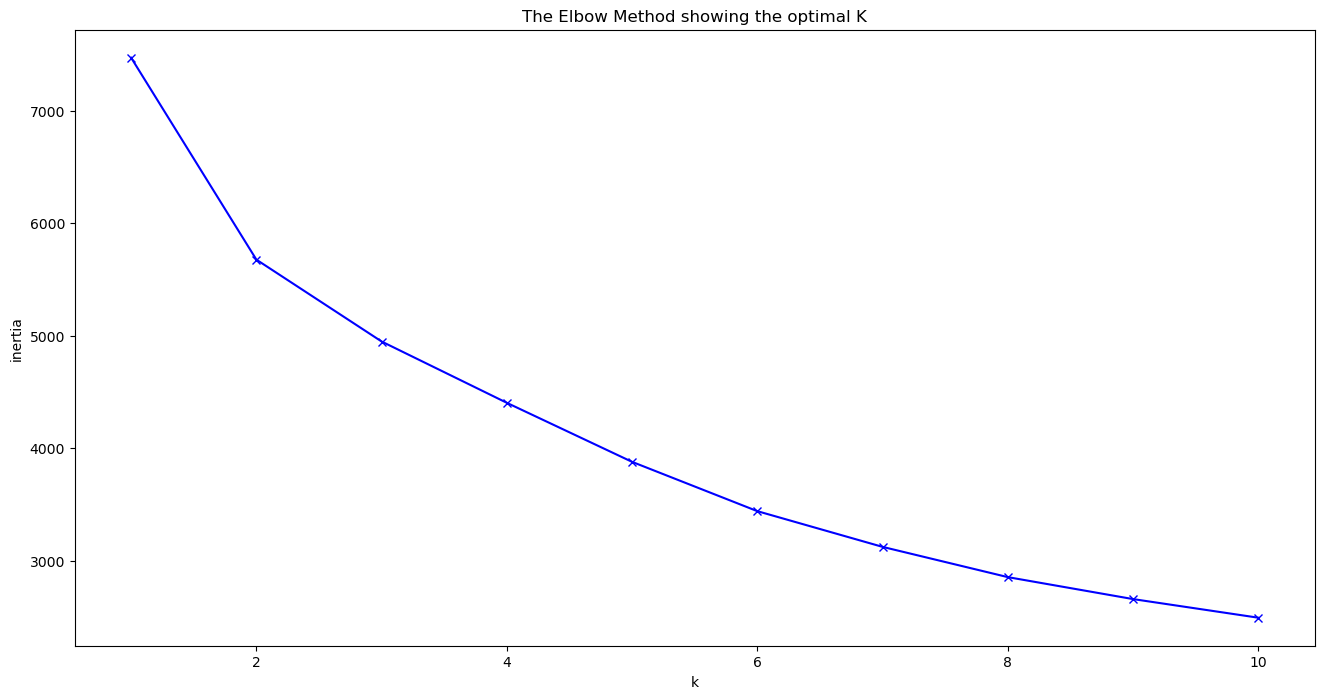

In [199]:
# plot elbow method
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal K')
plt.show()

In [200]:
silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    label=kmeanModel.predict(df_scaled)
    silhouettes.append(silhouette_score(df_scaled,label))


/Users/ckz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ckz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ckz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ckz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ckz/anaconda3/lib/pyt

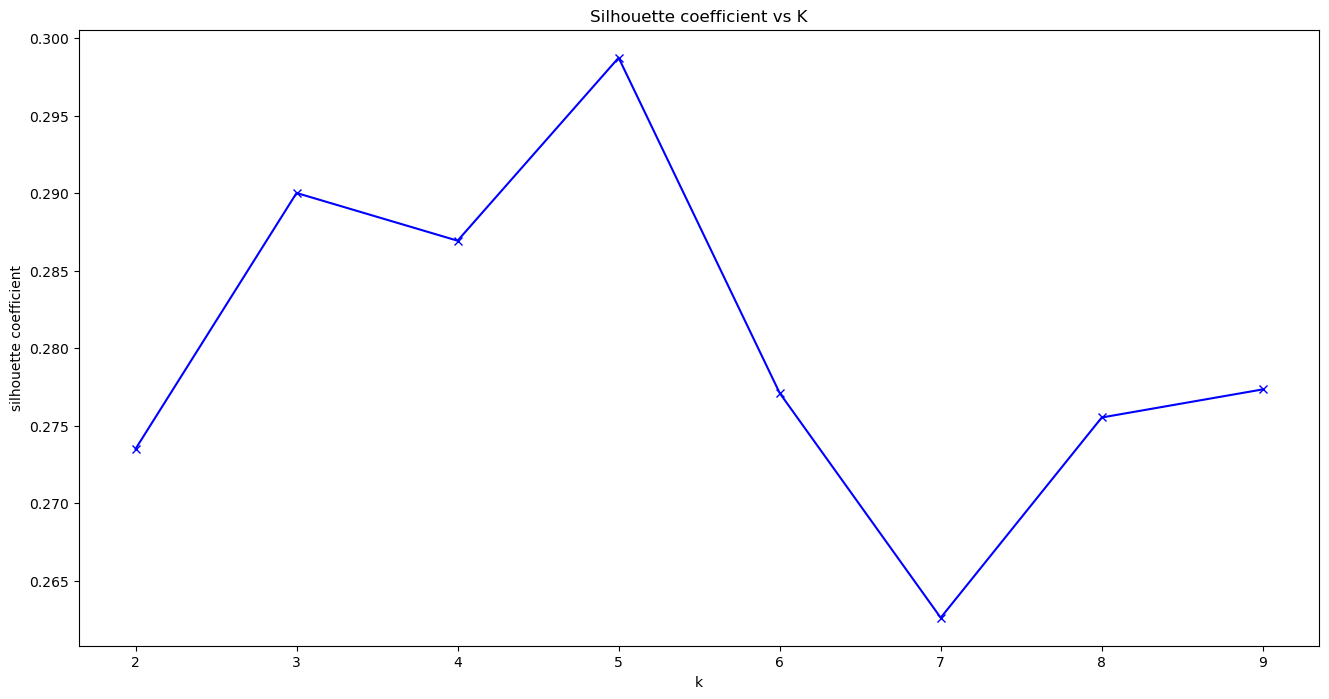

In [201]:
# plot silhouette
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

In [237]:
# run the model using three clusters
kmodel = KMeans(n_clusters=3,
                n_init=11)

In [238]:
# Identify clusters
y_km = kmodel.fit_predict(df_scaled)

In [239]:
# Check how many data points fall within each cluster
pd.Series(kmodel.labels_).value_counts()

1    281
0    241
2    225
dtype: int64

In [240]:
# Append clusters to customers training data
df_scaled['y_km'] = y_km

In [241]:
df_scaled

,income,has_savings,savings_balance,has_credit_card,credit_limit,credit_balance,debt_usage,nbr_transactions,average_trans_amt,all_spending,y_km
0,0.154185,-1.136403,-0.426558,-1.295152,-0.747104,-0.608137,-0.828618,-1.603560,-0.060959,-0.341751,1
1,-0.726524,0.879970,-0.418803,0.772110,0.604087,0.660202,0.422776,-0.012798,-0.346983,1.049457,0
2,-0.188366,0.879970,-0.352837,0.772110,-0.296707,-0.373275,-0.133446,0.187978,-0.045652,-0.490068,2
3,1.123798,0.879970,-0.059979,0.772110,0.333848,-0.608137,-0.828618,0.249755,0.351702,-1.054444,2
4,0.983479,0.879970,-0.273737,0.772110,2.270555,-0.551873,-0.803762,0.450531,0.633618,-0.913402,2
...,...,...,...,...,...,...,...,...,...,...,...
742,-0.357478,-1.136403,-0.426558,-1.295152,-0.747104,-0.608137,-0.828618,-0.924011,-0.162255,0.315464,1
743,0.164864,0.879970,-0.368653,0.772110,-0.161588,0.456847,1.596203,-0.754124,-0.194054,0.194036,0
744,1.738064,-1.136403,-0.426558,0.772110,3.396547,6.928676,1.596203,0.357865,-0.953671,3.589977,2
745,-0.343735,-1.136403,-0.426558,0.772110,0.604087,0.854963,0.614935,1.083747,-0.086780,0.045513,0


In [242]:
n_components = 2
pca = PCA(n_components=n_components)
components = pca.fit_transform(df_scaled.iloc[:, :-1])
labels = {
    str(i): f'PC {i+1} ({var:.1f}%)'
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

label_dict = {0: 'cluster 0',
             1: 'cluster 1',
             2: 'cluster 2',
             3: 'cluster 3',
             4: 'cluster 4'}

In [243]:
total_var = pca.explained_variance_ratio_.sum() * 100
print(f'Total Explained Variance: {total_var:.2f}%')

Total Explained Variance: 48.89%


In [244]:
labels

{'0': 'PC 1 (32.8%)', '1': 'PC 2 (16.1%)'}

In [245]:
pca = PCA(n_components=2).set_output(transform="pandas")
df_pca = pca.fit_transform(df_scaled) #enconded and scaled data (that was passed into clustering algo)
df_pca.head()

,pca0,pca1
0,-2.358386,-0.226959
1,1.288892,-1.017242
2,-0.072444,0.545509
3,-0.053432,1.939795
4,0.769752,2.625152


In [246]:
df_pca_with_clusters = df_pca.copy()
df_pca_with_clusters['y_km'] = df_scaled['y_km']
df_pca_with_clusters.head()

,pca0,pca1,y_km
0,-2.358386,-0.226959,1
1,1.288892,-1.017242,0
2,-0.072444,0.545509,2
3,-0.053432,1.939795,2
4,0.769752,2.625152,2


In [247]:
#to visualize centroids in PCA space, we also need to transform them.
pca_centroids = pca.transform(kmodel.cluster_centers_)
pca_centroids

/Users/ckz/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,pca0,pca1
0,1.485121,-1.034707
1,-1.956809,0.271700
2,0.666977,1.746550


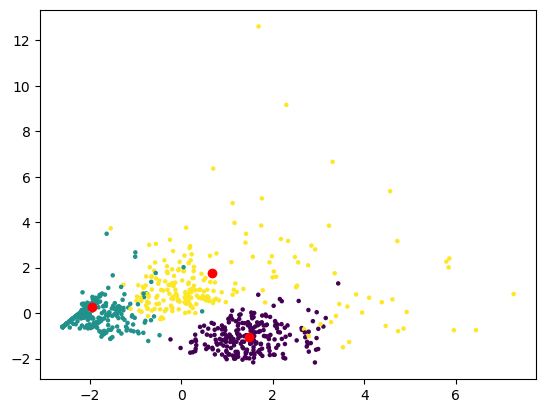

In [248]:
plt.scatter(df_pca_with_clusters['pca0'], df_pca_with_clusters['pca1'], c=df_pca_with_clusters['y_km'], s=5)
plt.scatter(pca_centroids['pca0'], pca_centroids['pca1'], c='red')

In [236]:
#these are the coefficients used for each PC (in the linear combination calculation).
pca.components_

array([[ 0.11677568,  0.12992763,  0.08259821,  0.42287696,  0.28833133,
         0.4060763 ,  0.46791907,  0.39422722, -0.03498779,  0.23602356,
        -0.32327593],
       [ 0.40791913,  0.05191857,  0.22502329,  0.11405605,  0.46457397,
         0.17646747, -0.20503755,  0.01323198,  0.15223122, -0.05722563,
         0.67203263]])

In [258]:
# Get the component loadings
loadings = pd.DataFrame(pca.components_, columns=df_scaled.columns)

# Print the loadings for PC1 and PC2
print("Loadings for PC1:")
print(loadings.iloc[0])
print()
print("Loadings for PC2:")
print(loadings.iloc[1])

Loadings for PC1:
income               0.195774
has_savings          0.135206
savings_balance      0.119808
has_credit_card      0.441147
credit_limit         0.379023
credit_balance       0.446114
debt_usage           0.421838
nbr_transactions     0.391860
average_trans_amt   -0.017248
all_spending         0.232621
y_km                -0.076422
Name: 0, dtype: float64

Loadings for PC2:
income               0.326798
has_savings          0.204676
savings_balance      0.372564
has_credit_card      0.054398
credit_limit         0.398480
credit_balance      -0.082539
debt_usage          -0.350826
nbr_transactions    -0.023766
average_trans_amt    0.375219
all_spending        -0.344105
y_km                 0.401381
Name: 1, dtype: float64


In [257]:
cluster_0_means = df_finals[df_scaled['y_km']==0].mean()
cluster_1_means = df_finals[df_scaled['y_km']==1].mean()
cluster_2_means = df_finals[df_scaled['y_km']==2].mean()


means = pd.DataFrame([cluster_0_means, cluster_1_means, cluster_2_means])
means


,income,has_savings,savings_balance,has_credit_card,credit_limit,credit_balance,debt_usage,nbr_transactions,average_trans_amt,all_spending
0,18314.514523,0.647303,653.454440,1.000000,1713.278008,1316.209917,83.356997,150.103734,-9.237581,1816.729627
1,18346.039146,0.437722,512.346797,0.010676,10.676157,0.355872,0.035587,54.608541,-0.408686,546.814484
2,32928.848889,0.631111,1014.184889,0.995556,3658.666667,1054.310667,24.123080,115.733333,35.906961,280.215778


In [ ]:
## Radar chart

In [250]:

df_radar = df_scaled[['savings_balance','debt_usage','nbr_transactions','all_spending','y_km']]

In [260]:
df_radar['y_km'].value_counts()

1    281
0    241
2    225
Name: y_km, dtype: int64

In [252]:
radar_df = df_radar.groupby(by='y_km').mean()
radar_df.head()

,savings_balance,debt_usage,nbr_transactions,all_spending
y_km,,,,
0,-0.033433,1.192640,0.714686,0.366827
1,-0.118325,-0.827755,-0.760170,-0.128477
2,0.183586,-0.243676,0.183859,-0.232459


In [254]:
categories = df_radar.columns.to_list()

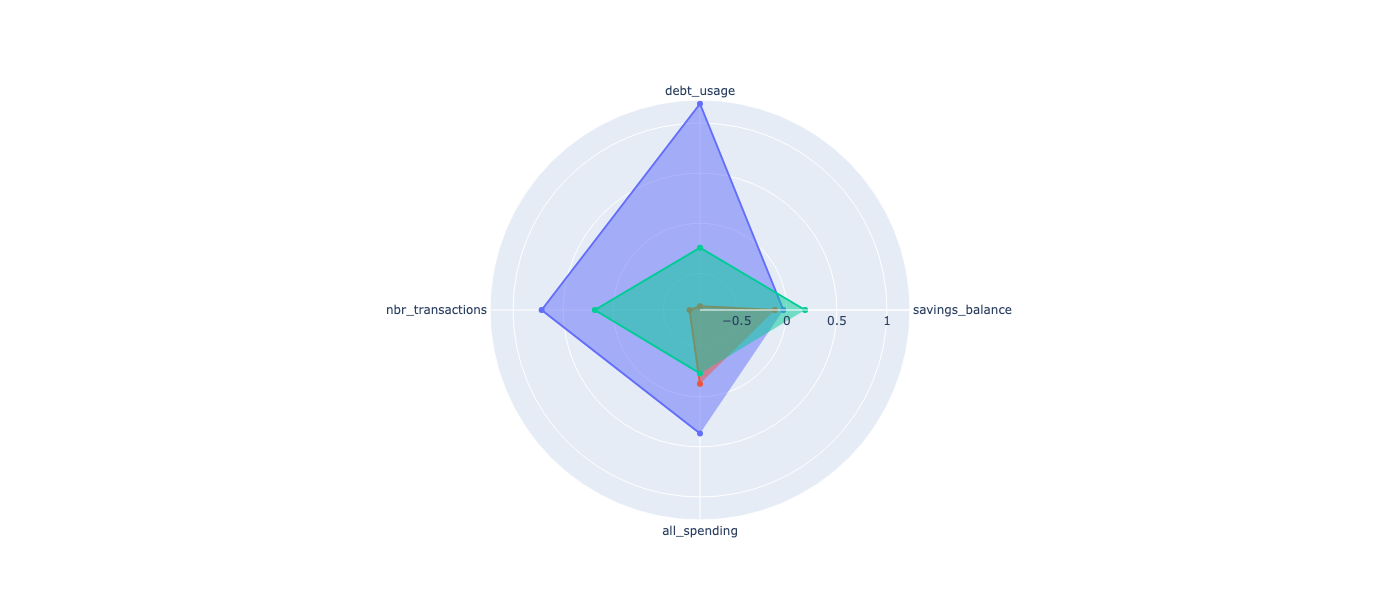

In [256]:
fig = go.Figure()

for cluster in range(radar_df.shape[0]):
    fig.add_trace(go.Scatterpolar(
        r=radar_df.iloc[cluster, :5],
        theta=categories,
        fill='toself',
        name=f'Cluster {cluster}'
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True,
                               range=[0, max(df_radar)])),
    showlegend=False,
    height = 600,
    width = 800
)